In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import random

In [88]:
MAX = 20

API_KEY = "48e0bf10bd721602a930738080e4daf4"
url = f"https://api.themoviedb.org/3/movie/{{}}?api_key={API_KEY}&append_to_response=budget,revenue"

all_movies = []

page_number = 1
while page_number < MAX:
    random_number = random.random()
    random_page_number = random.randint(1, MAX)
    response = requests.get(f"https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&sort_by=vote_count.desc&random={random_number}&page={random_page_number}")
    if response.status_code == 200:
        data = response.json()
        for movie in data['results']:
            movie_id = movie['id']
            movie_response = requests.get(url.format(movie_id))
            if movie_response.status_code == 200:
                movie_data = movie_response.json()
                cast_response = requests.get(f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={API_KEY}")
                if cast_response.status_code == 200:
                    cast_data = cast_response.json()
                    budget = movie_data['budget']
                    revenue = movie_data['revenue']
                    if budget == 0 or revenue == 0:
                        continue  # exclude movies with budget or revenue 0
                    release_date = movie_data['release_date']
                    if release_date:
                        release_decade = release_date[:3] + '0s'
                    else:
                        release_decade = None
                    all_movies.append({
                        'Title': movie_data['title'],
                        'Genres': [genre['name'] for genre in movie_data['genres']],
                        'Cast': [actor['name'] for actor in cast_data['cast']][:5],
                        'Budget': budget,
                        'Revenue': revenue,
                        'Popularity': movie_data['popularity'],
                        'Vote_average': movie_data['vote_average'],
                        'Release_decade': release_decade,
                    })
                else:
                    print(f"Error {cast_response.status_code}: {cast_response.reason}")
                    break
            else:
                print(f"Error {movie_response.status_code}: {movie_response.reason}")
                break
        total_pages = data['total_pages']
        if page_number >= total_pages:
            break
        page_number += 1
    else:
        print(f"Error {response.status_code}: {response.reason}")
        break

df = pd.DataFrame(all_movies)
df.head(200)

,Title,Genres,Cast,Budget,Revenue,Popularity,Vote_average,Release_decade
0,Inception,"[Action, Science Fiction, Adventure]","[Leonardo DiCaprio, Joseph Gordon-Levitt, Ken ...",160000000,825532764,86.062,8.361,2010s
1,Interstellar,"[Adventure, Drama, Science Fiction]","[Matthew McConaughey, Anne Hathaway, Jessica C...",165000000,701729206,152.730,8.398,2010s
2,The Dark Knight,"[Drama, Action, Crime, Thriller]","[Christian Bale, Heath Ledger, Michael Caine, ...",185000000,1004558444,73.541,8.509,2000s
3,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldaña, Sigourney Weave...",237000000,2920357254,241.318,7.569,2000s
4,The Avengers,"[Science Fiction, Action, Adventure]","[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",220000000,1518815515,159.761,7.708,2010s
...,...,...,...,...,...,...,...,...
195,Shutter Island,"[Drama, Thriller, Mystery]","[Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley...",80000000,294800000,42.063,8.197,2010s
196,The Lord of the Rings: The Return of the King,"[Adventure, Fantasy, Action]","[Elijah Wood, Ian McKellen, Liv Tyler, Viggo M...",94000000,1118888979,71.166,8.500,2000s
197,The Wolf of Wall Street,"[Crime, Drama, Comedy]","[Leonardo DiCaprio, Jonah Hill, Margot Robbie,...",100000000,392000000,119.366,8.037,2010s
198,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",365000000,1405403694,122.894,7.281,2010s


In [89]:
print(df.head(200))

                                             Title  \
0                                        Inception   
1                                     Interstellar   
2                                  The Dark Knight   
3                                           Avatar   
4                                     The Avengers   
..                                             ...   
195                                 Shutter Island   
196  The Lord of the Rings: The Return of the King   
197                        The Wolf of Wall Street   
198                        Avengers: Age of Ultron   
199                     Captain America: Civil War   

                                            Genres  \
0             [Action, Science Fiction, Adventure]   
1              [Adventure, Drama, Science Fiction]   
2                 [Drama, Action, Crime, Thriller]   
3    [Action, Adventure, Fantasy, Science Fiction]   
4             [Science Fiction, Action, Adventure]   
..                         

In [90]:
print(df.describe())

             Budget       Revenue  Popularity  Vote_average
count  3.710000e+02  3.710000e+02  371.000000    371.000000
mean   9.608835e+07  5.100183e+08   67.368151      7.474919
std    7.737691e+07  3.991893e+08   50.313840      0.605531
min    1.200000e+06  2.859750e+06    1.484000      5.810000
25%    2.750000e+07  2.335557e+08   34.272500      7.121000
50%    8.000000e+07  4.253682e+08   54.818000      7.514000
75%    1.500000e+08  7.093361e+08   84.806000      7.923000
max    3.800000e+08  2.920357e+09  369.542000      8.701000


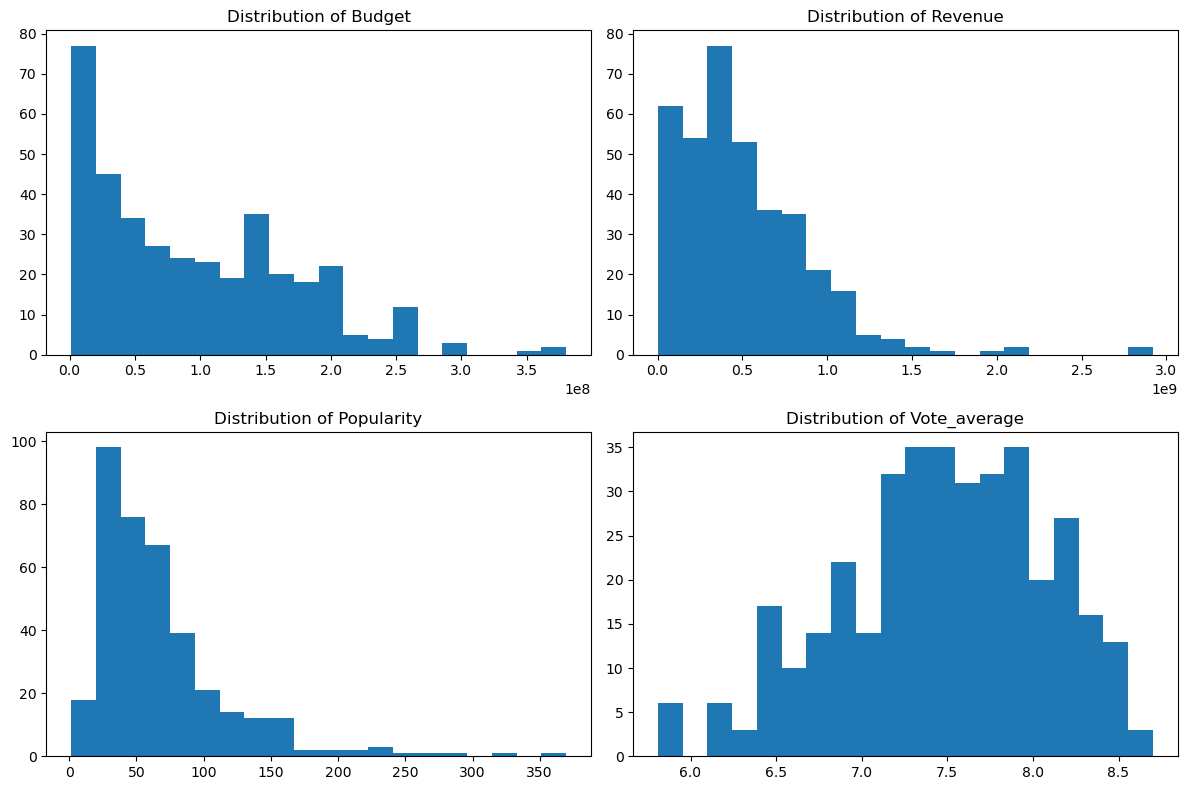

In [91]:
num_cols = ['Budget', 'Revenue', 'Popularity', 'Vote_average']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    axs[i].hist(df[col], bins=20)
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

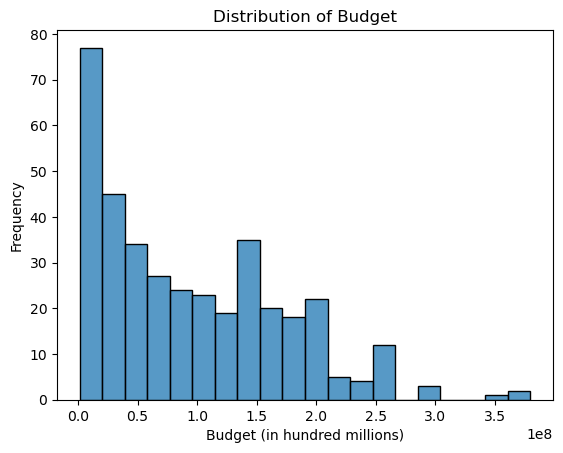

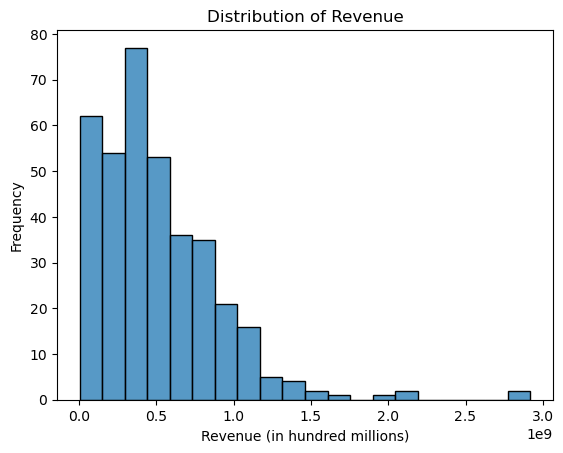

In [92]:
sns.histplot(data=df, x='Budget', bins=20)
plt.title('Distribution of Budget')
plt.xlabel('Budget (in hundred millions)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df, x='Revenue', bins=20)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in hundred millions)')
plt.ylabel('Frequency')
plt.show()


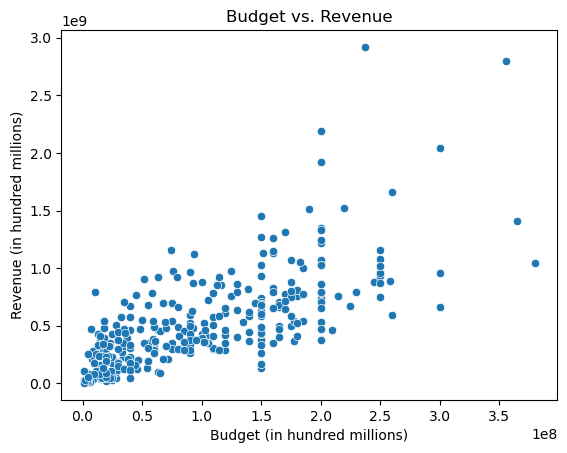

In [93]:
sns.scatterplot(data=df, x='Budget', y='Revenue')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (in hundred millions)')
plt.ylabel('Revenue (in hundred millions)')
plt.show()

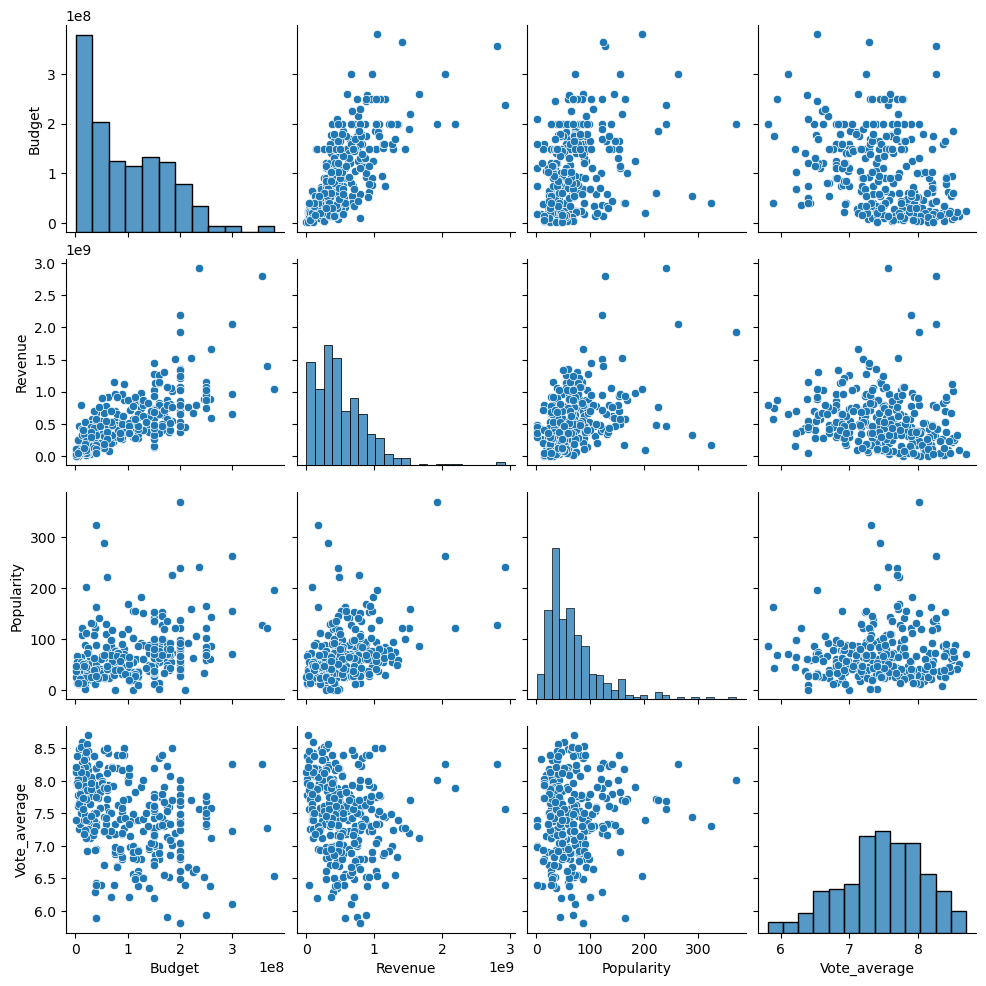

In [94]:
sns.pairplot(data=df, vars=['Budget', 'Revenue', 'Popularity', 'Vote_average'])
plt.show()


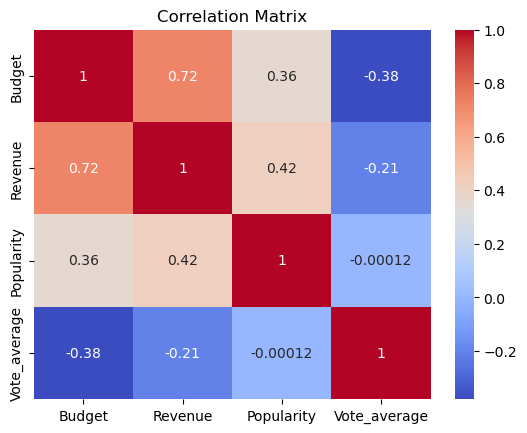

In [95]:
corr = df[['Budget', 'Revenue', 'Popularity', 'Vote_average']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

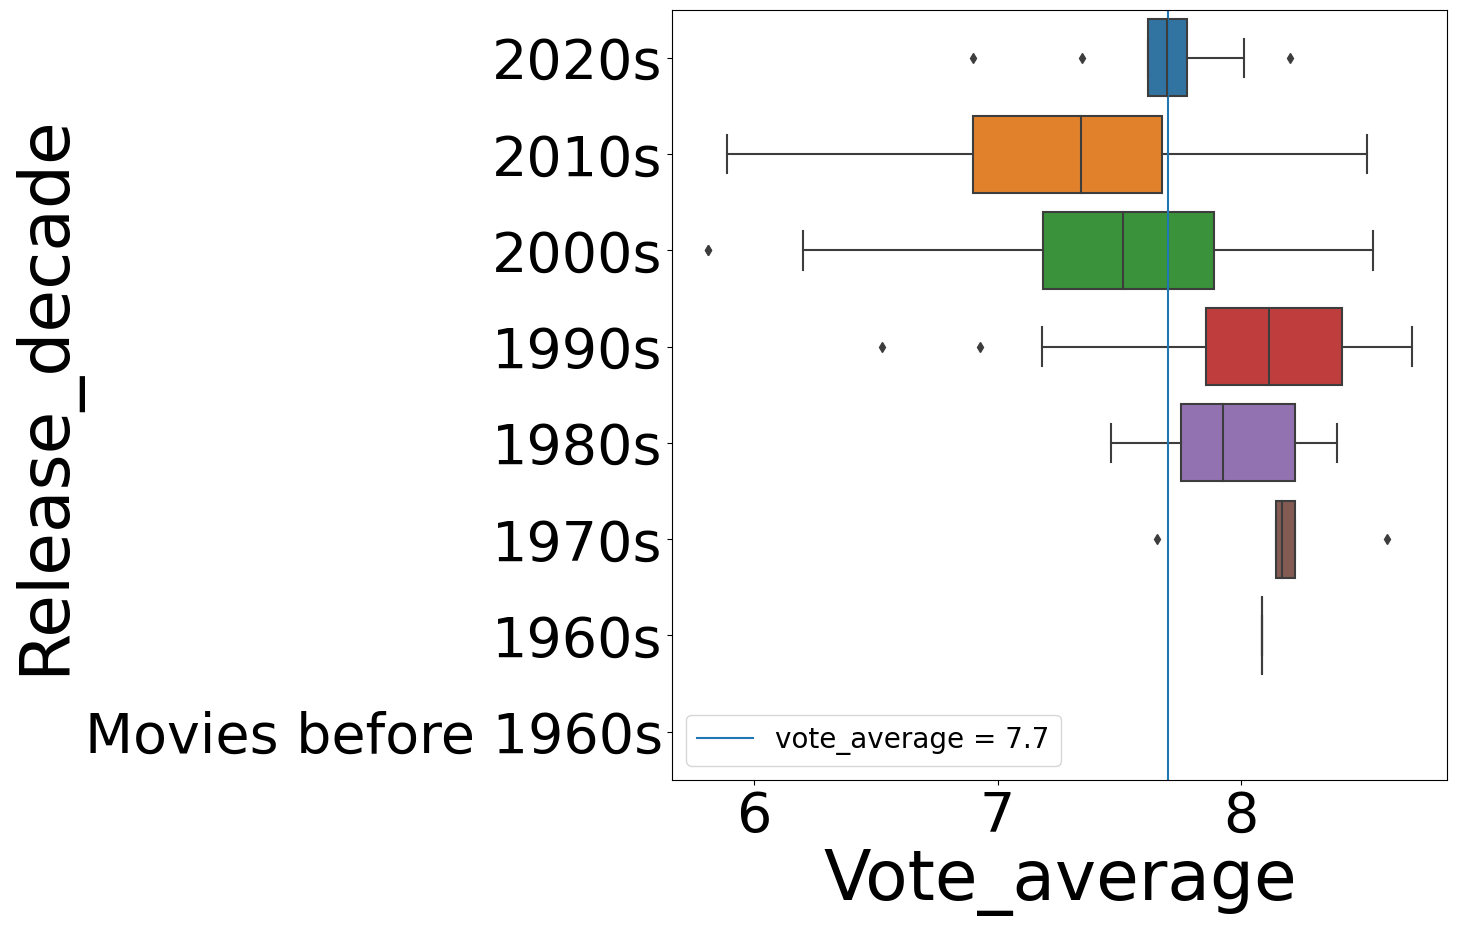

In [103]:
f, ax= plt.subplots(figsize=(10, 10))
sns.boxplot(x = "Vote_average", y = "Release_decade", data = df, orient = "h",order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Movies before 1960s"])
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Vote_average",fontsize=50)
ax.set_ylabel("Release_decade",fontsize=50)
plt.axvline(7.7, label= "vote_average = 7.7")
plt.legend(fontsize=20)
plt.show()

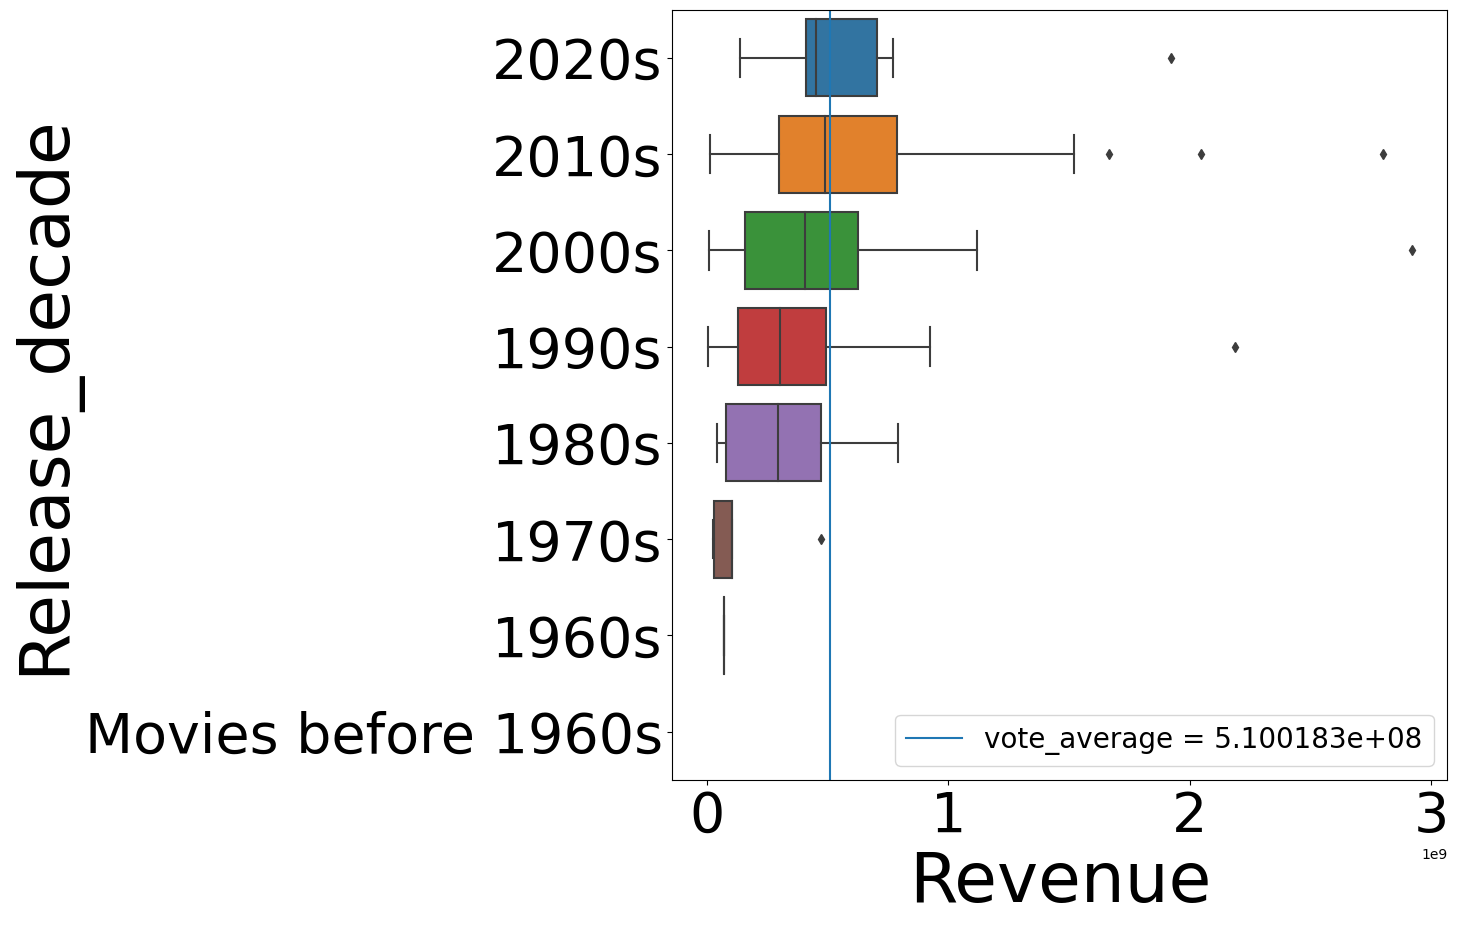

In [102]:
f, ax= plt.subplots(figsize=(10, 10))
sns.boxplot(x = "Revenue", y = "Release_decade", data = df, orient = "h",order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Movies before 1960s"])
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Revenue",fontsize=50)
ax.set_ylabel("Release_decade",fontsize=50)
plt.axvline(5.100183e+08, label= "vote_average = 5.100183e+08")
plt.legend(fontsize=20)
plt.show()

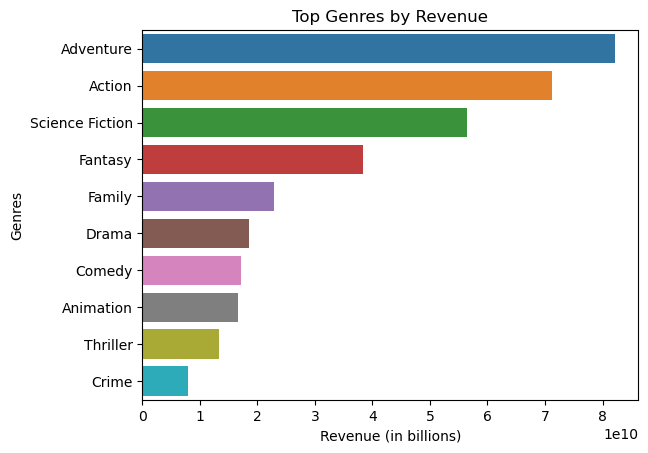

In [77]:
genre_revenue = df.explode('Genres').groupby('Genres')['Revenue'].sum().reset_index()
genre_revenue = genre_revenue.sort_values('Revenue', ascending=False).head(10)
sns.barplot(data=genre_revenue, x='Revenue', y='Genres')
plt.title('Top Genres by Revenue')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Genres')
plt.show()


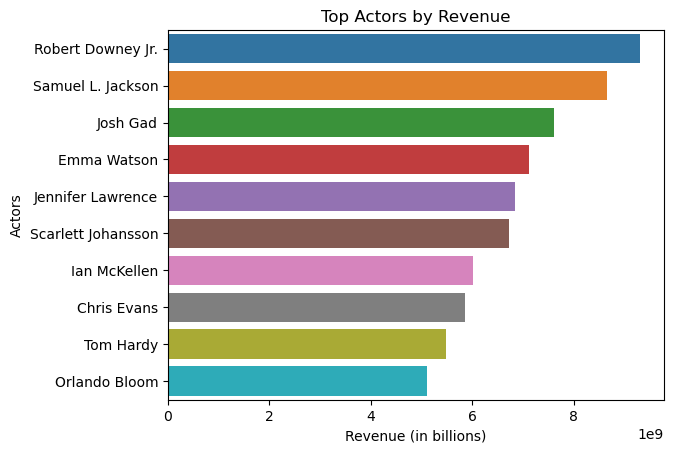

In [76]:
actor_revenue = df.explode('Cast').groupby('Cast')['Revenue'].sum().reset_index()
actor_revenue = actor_revenue.sort_values('Revenue', ascending=False).head(10)
sns.barplot(data=actor_revenue, x='Revenue', y='Cast')
plt.title('Top Actors by Revenue')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Actors')
plt.show()